In [1]:
#import ipympl
import numpy as np
from matplotlib import pyplot as plt

X, Y = np.loadtxt("RMSxrd_1.txt", unpack = True)

In [3]:
from mp_api.client import MPRester
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer

with MPRester(api_key="U5f8moSqdUkYEVxZAvygKrCN3N7VOT3H") as mpr:
    # first retrieve the relevant structure
    structure_RMS = mpr.get_structure_by_material_id("mp-864966")
    structure_Ru = mpr.get_structure_by_material_id("mp-33")
    
# important to use the conventional structure to ensure
# that peaks are labelled with the conventional Miller indices
sga_RMS = SpacegroupAnalyzer(structure_RMS)
conventional_structure_RMS = sga_RMS.get_conventional_standard_structure()
sga_Ru = SpacegroupAnalyzer(structure_Ru)
conventional_structure_Ru = sga_Ru.get_conventional_standard_structure()


# this example shows how to obtain an XRD diffraction pattern
# these patterns are calculated on-the-fly from the structure
calculator = XRDCalculator(wavelength="CuKa")
pattern_RMS = calculator.get_pattern(conventional_structure_RMS,two_theta_range=(0,100))
pattern_Ru = calculator.get_pattern(conventional_structure_Ru,two_theta_range=(0,100))

#calculator.get_plot(conventional_structure, (0, 100), annotate_peaks='compact', with_labels=True, fontsize=16)
# calculator.plot_structures( [conventional_structure_RMS],two_theta_range=(0,100) ,annotate_peaks='compact',fontsize=16,tight_layout=True,ax_grid=True,show=False,size_kwargs=dict(w=19.0, h=10.8))
# yy = (Y *100 /max(Y)) 
# plt.plot(X,yy-min(yy),color='blue')
# plt.title(r' Intensity Vs 2$ \theta $')
# #plt.xlabel(r'$2\theta \ (degree) \rightarrow$')
# #plt.ylabel(r'Intensity (counts) $\rightarrow $')


# #plt.grid()
# plt.savefig('graph.png')

# plt.show()

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

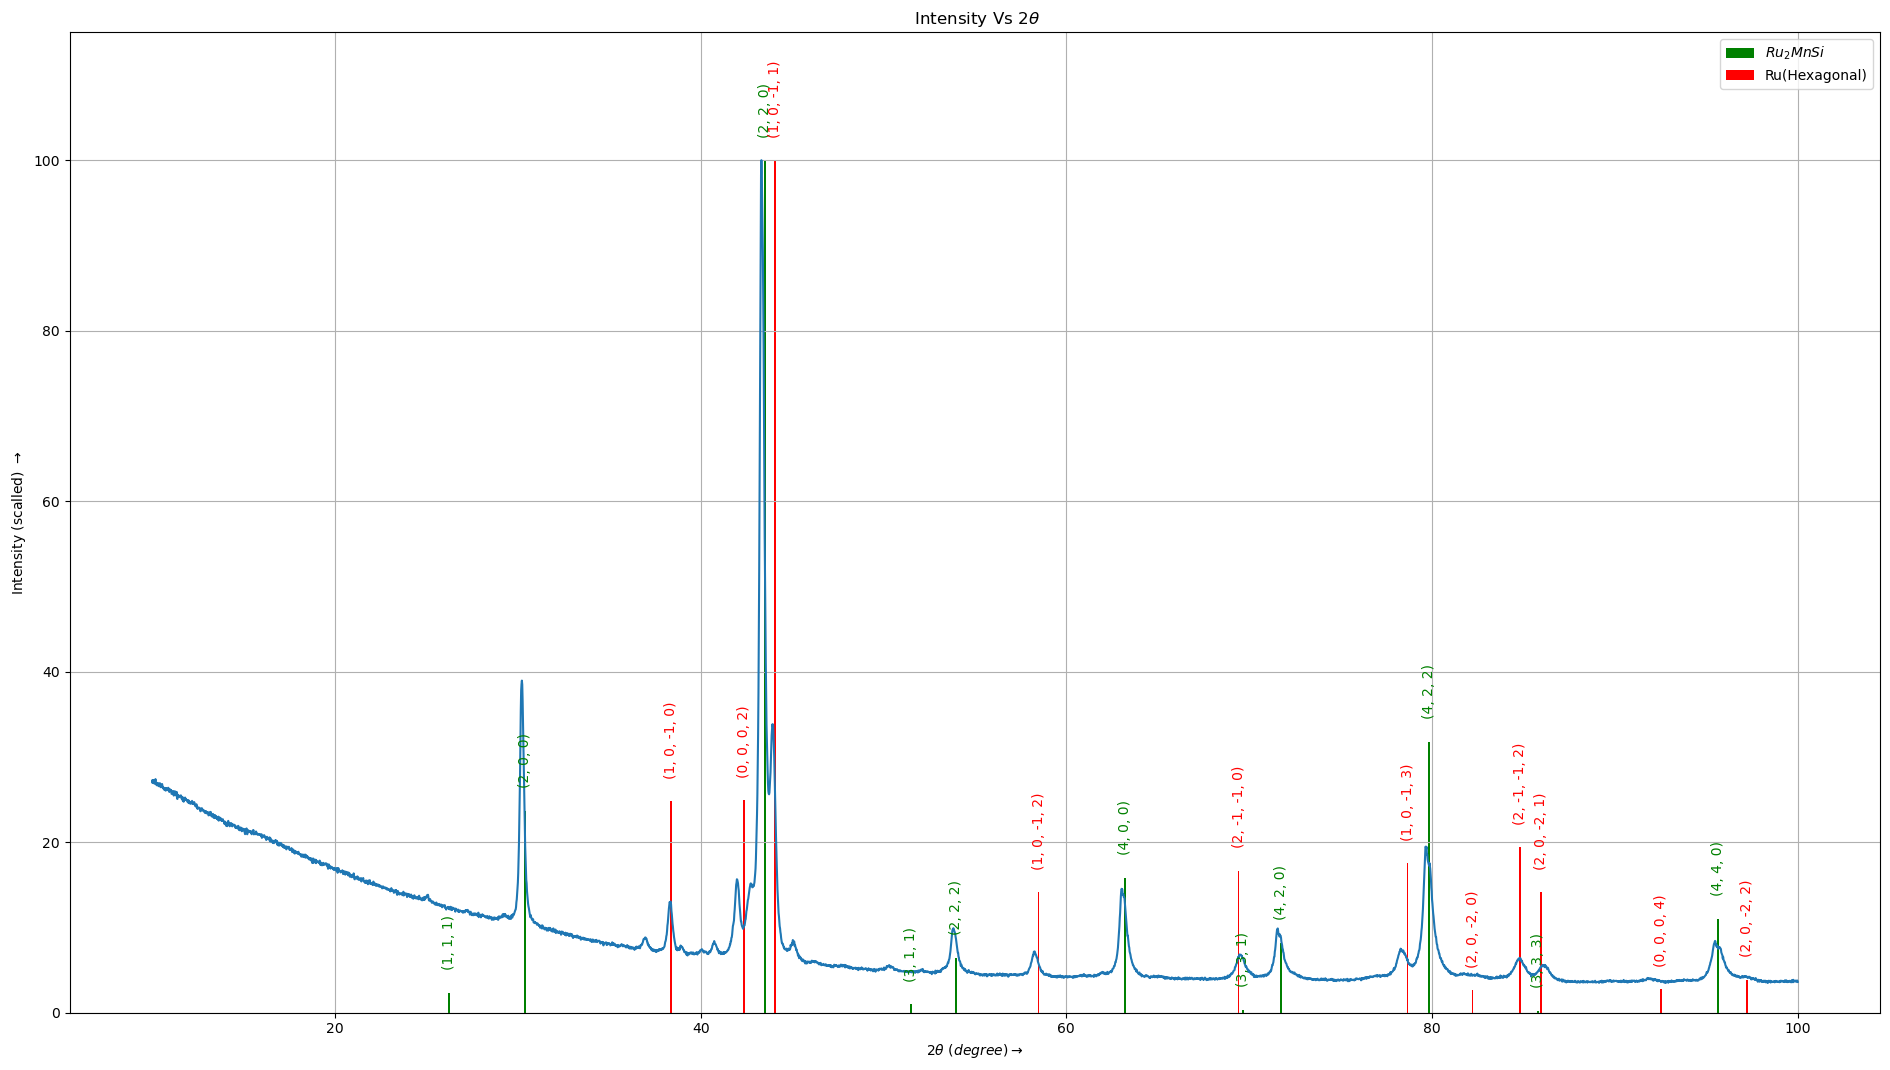

In [4]:
plt.figure(figsize=(19,10.8))
plt.bar(pattern_RMS.x, pattern_RMS.y,width = 0.1,color='green',label = r'$ Ru_2MnSi$' )
for  i in range(len(pattern_RMS.x)):
    tx_RMS = pattern_RMS.hkls[i][0]
    plt.text(pattern_RMS.x[i],pattern_RMS.y[i]+3,tx_RMS['hkl'],ha='center',rotation='vertical',color='green')
    
#for other one
plt.bar(pattern_Ru.x, pattern_Ru.y,width = 0.1,color='red',label = 'Ru(Hexagonal)')
for  i in range(len(pattern_Ru.x)):
    tx_Ru = pattern_Ru.hkls[i][0]
    plt.text(pattern_Ru.x[i],pattern_Ru.y[i]+3,tx_Ru['hkl'],ha='center',rotation='vertical',color='red')



plt.plot(X,yy)
plt.title(r' Intensity Vs 2$ \theta $')
plt.ylim(0, 115)
plt.legend()
plt.xlabel(r'$2\theta \ (degree) \rightarrow$')
plt.ylabel(r'Intensity (scalled) $\rightarrow $')
plt.grid()
plt.tight_layout()
plt.savefig('RMS_Ru.png', dpi=400)
plt.show()